## Clustering with Sci-kit Learn

In [1]:
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
sns.set_theme(palette='colorblind')

# set global random seed so that the notes are the same each time the site builds
np.random.seed(1103)

First we will load the iris data from Seaborn

In [2]:
iris_df = sns.load_dataset('iris')

To consider what our clustering algorithm sees, we will plot the grid of subplots without the species labeling the point.s.

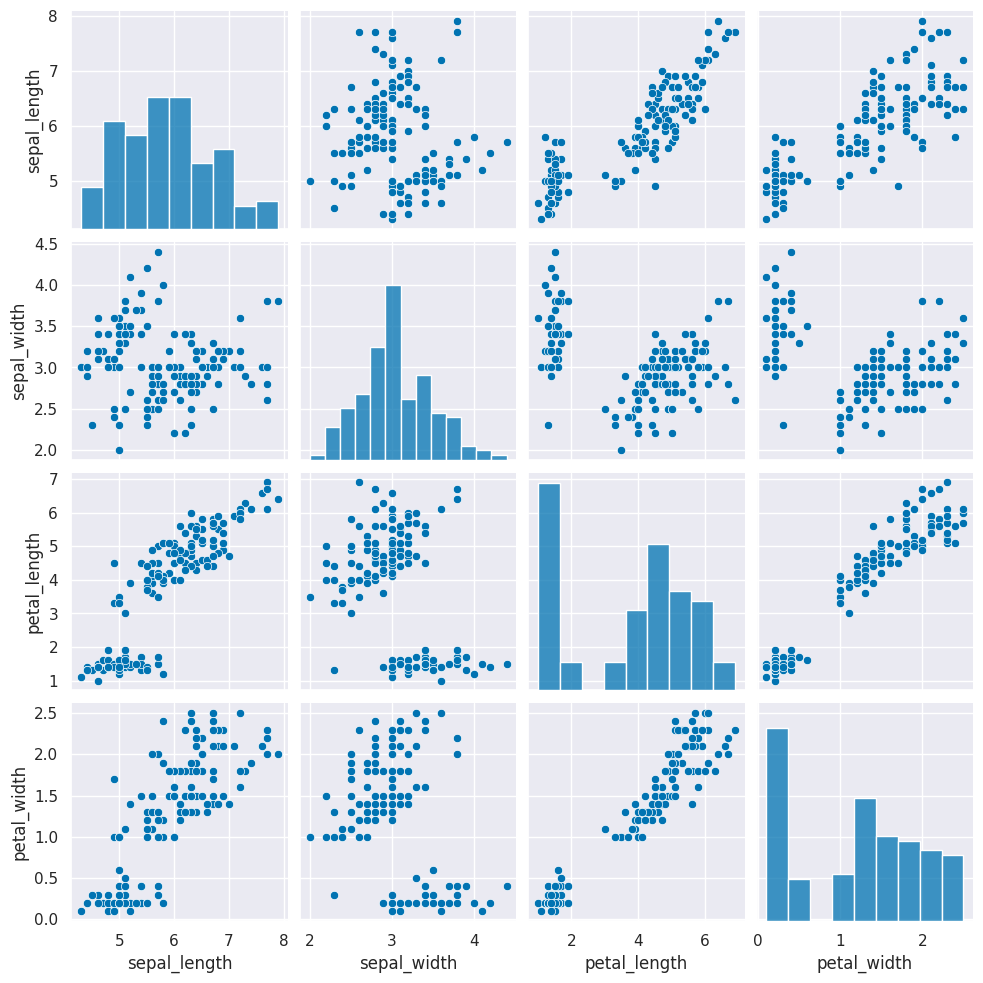

In [3]:
sns.pairplot(data=iris_df)

We need a copy of the data that's appropriate for clustering. Remember that clustering is *unsupervised* so it doesn't have a target variable. We also can do clustering on the data with or without splitting into test/train splits, since it doesn't use a target variable, we can evaluate how good the clusters it finds are on the actual data that it learned from.

In [4]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


```{hint}
We can either pick the measurements out or drop the species column.
remember most data frame operations return a copy of the dataframe.
```

We'll do this by dropping the species for now, but we could have also selected the measurement columns.

In [5]:
iris_X = iris_df.drop(columns=['species'])
iris_X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


## KMeans Estimator

Create a Kmeans estimator object with 3 clusters, since we know that the iris data has 3 species of flowers. We refer to these three groups as classes in classification (the goal is to label the classes...) and in clustering we typically borrow that word.  Sometimes, clustering literature will be more abstract and refer to partitions, this is especially common in more mathematical/statistical work as opposed to algorithmic work on clustering.

In [6]:
km = KMeans(n_clusters=3)

we use this to instantiate the object with the right number since we know that is correct.


```{admonition} Question
How do we know there are three classes? didnt' we just drop them?

```

We dropped the *column* that tells us which of the three classes that each sample(row) belongs to.  We still have data from three species of flows.

```{hint}
use shift+tab or another jupyter help to figure out what the parameter names are for any function or class you're working with.
```

## Fit and Predict


Since we don't have separate test and train data, we can use the `fit_predict` method.  This is what the kmeans algorithm always does anyway, it both learns the means and the assignment (or prediction) for each sample at the same time.  On Monday, that would be the last column of the dataframe, the one in the highest.

In [7]:
km.fit_predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [8]:
iris_df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

This gives the labeled cluster by index, or the assignment, of each point.

These are similar to the outputs in classification, except that in classification, it's able to tell us a specific species for each. Here it can only say clust 0, 1, or 2.  It can't match those groups to the species of flower.

Now that we know what these are, we can save them to a variable.

In [9]:
cluster_assignments = km.fit_predict(iris_X)
cluster_assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Use the `get_params` method to look at the parameters.  Read the documentation to see what they mean.

In [10]:
km.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Visualizing the outputs

Add the predictions as a new column to the original `iris_df` and make a `pairplot` with the points colored by what the clustering learned.

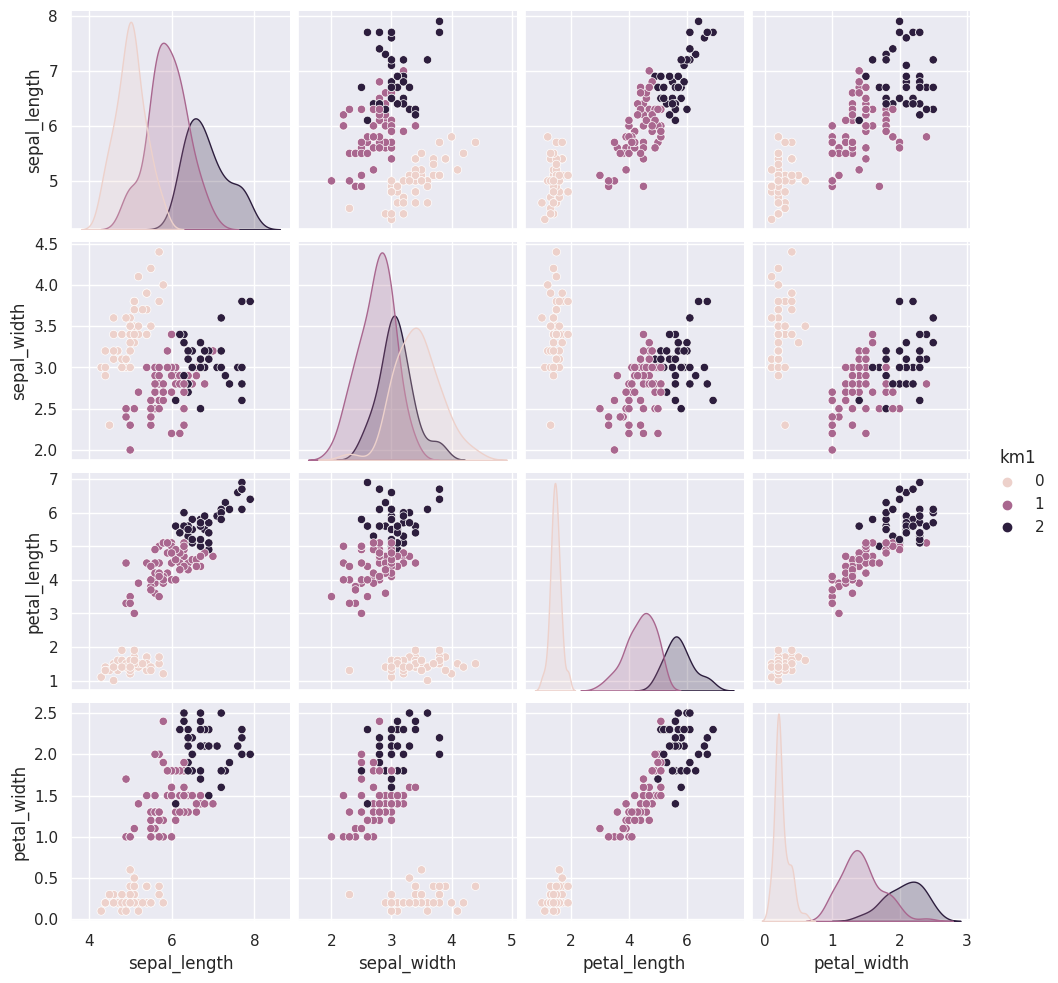

In [11]:
iris_df['km1'] = cluster_assignments
sns.pairplot(data=iris_df,hue='km1')

In [12]:
iris_df['km2'] = km.fit_predict(iris_X)

In [13]:
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,km1,km2
0,5.1,3.5,1.4,0.2,setosa,0,1


In [14]:
measurement_cols = ['sepal_length','petal_length','sepal_width','petal_width']

We need to pick out only the measurement columns for plotting. The way have done this in the past is to subset the dataFrame

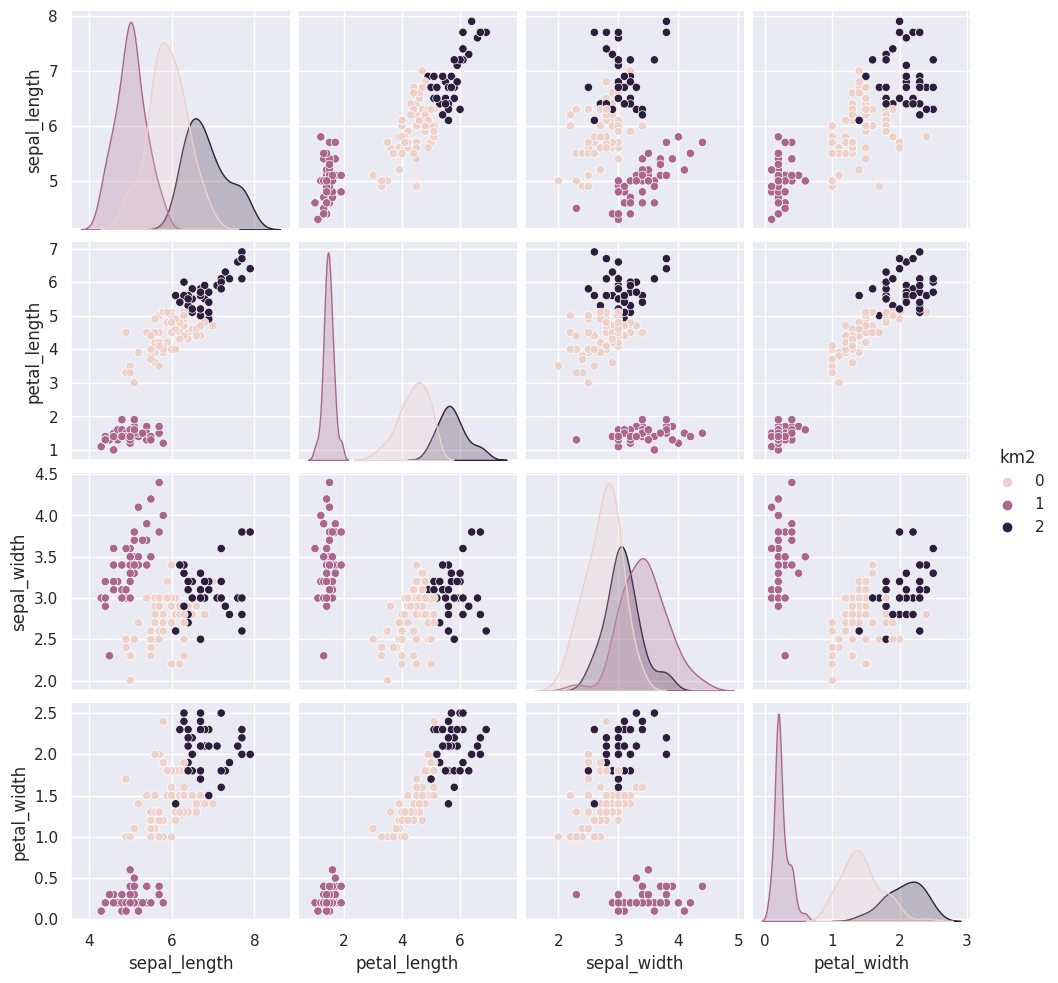

In [15]:
sns.pairplot(iris_df[measurement_cols+['km2']],hue='km2')

We can use the `vars` parameter to plot only the measurement columns and not the cluster labels.  We didn't have to do this before, because `species` is strings, but the cluster predictions are also numerical, so by default seaborn plots them.

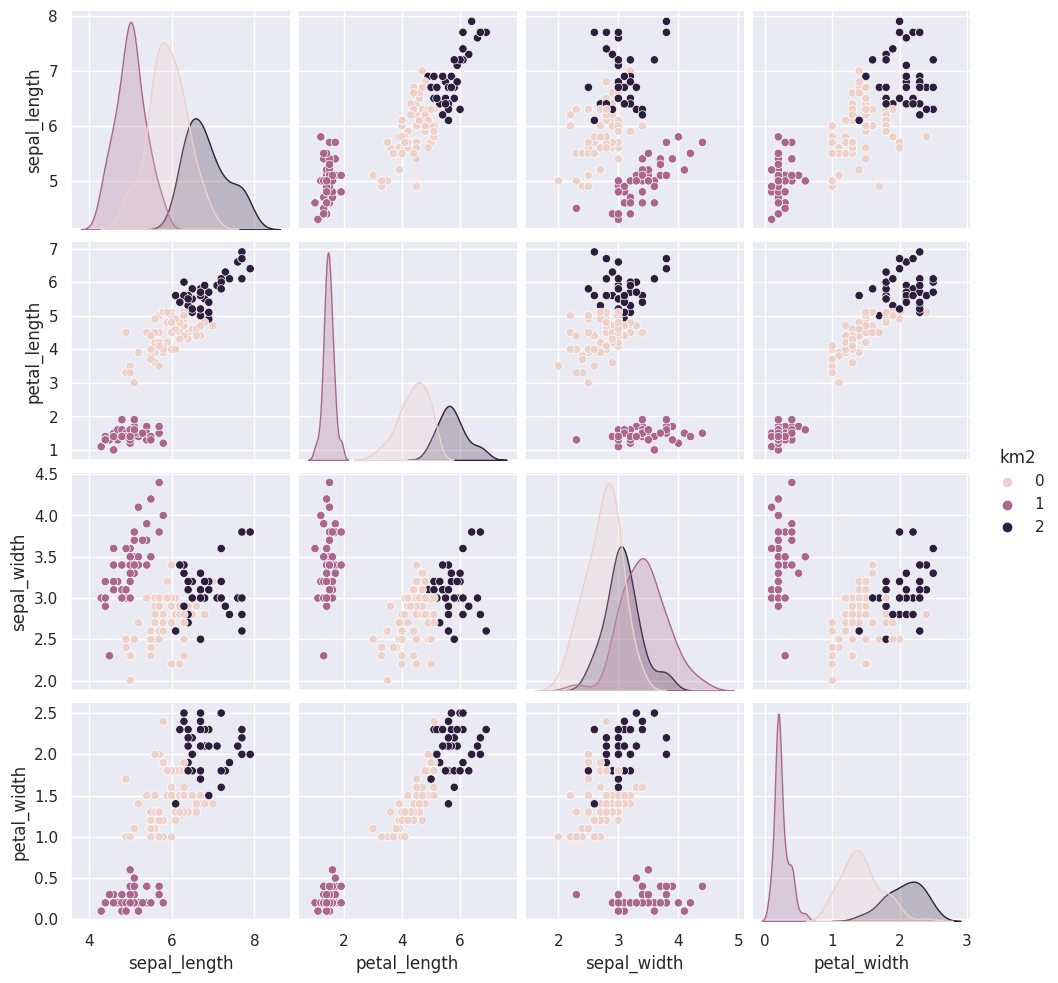

In [16]:
sns.pairplot(data=iris_df, hue='km2', vars=measurement_cols)

## Clustering Persistence

We can run kmeans a few more times and plot each time and/or compare with a neighbor/ another group.
````{margin}
```{tip}
using the i as a loop variable here makes sense since we're actually just repeating for the sake of repeating
```
````

In [17]:
for i in [3,4,5,6,7]:
    iris_df['km' + str(i)] = km.fit_predict(iris_X)


In [18]:
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,km1,km2,km3,km4,km5,km6,km7
116,6.5,3.0,5.5,1.8,virginica,2,2,2,2,2,2,2
92,5.8,2.6,4.0,1.2,versicolor,1,0,1,1,0,1,1
34,4.9,3.1,1.5,0.2,setosa,0,1,0,0,1,0,0
7,5.0,3.4,1.5,0.2,setosa,0,1,0,0,1,0,0
132,6.4,2.8,5.6,2.2,virginica,2,2,2,2,2,2,2
55,5.7,2.8,4.5,1.3,versicolor,1,0,1,1,0,1,1
45,4.8,3.0,1.4,0.3,setosa,0,1,0,0,1,0,0
96,5.7,2.9,4.2,1.3,versicolor,1,0,1,1,0,1,1
99,5.7,2.8,4.1,1.3,versicolor,1,0,1,1,0,1,1
141,6.9,3.1,5.1,2.3,virginica,2,2,2,2,2,2,2


The *grouping* of the points stay the same across different runs, but which color each group gets assigned to changes. Look at the 5th time compared to the ones before and 6 compared to that. Which blob is which color changes.


Today, we saw that the clustering solution was pretty similar each time in terms of which points were grouped together, but the labeling of the groups (which one was each number) was different each time.  We also saw that clustering can only number the clusters, it can't match them with certainty to the species. This makes evaluating clustering somewhat different, so we need new metrics.

What might be our goal for evaluating clustering? We'll start from evaluating clustering on Friday.  







## Question After Class


### How can we examine if the groups are the same each time?

One way using what we have already seen is to do it visually.

We could also groupby one of the `km` columns and then look at the `std` of the others.

In [19]:
iris_df.groupby('km1').std()

/tmp/ipykernel_2430/2783782698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iris_df.groupby('km1').std()


,sepal_length,sepal_width,petal_length,petal_width,km2,km3,km4,km5,km6,km7
km1,,,,,,,,,,
0,0.352490,0.379064,0.173664,0.105386,0.0,0.0,0.0,0.0,0.0,0.0
1,0.466410,0.296284,0.508895,0.297500,0.0,0.0,0.0,0.0,0.0,0.0
2,0.494155,0.290092,0.488590,0.279872,0.0,0.0,0.0,0.0,0.0,0.0
